### Q1. Explain, in detail, the above transform methods.

### Ans.

1. **Power Transform**:
<br>
A power transform removes a shift from a data distribution to make the distribution more-normal (Gaussian). On a time series dataset, this can have the effect of removing a change in variance over time.
Popular examples are the log transform (positive values) or generalized versions such as the Box-Cox transform (positive values) or the Yeo-Johnson transform (positive and negative values).

<br>

2. **Difference Transform**:
<br>
A difference transform is a simple way for removing a systematic structure from the time series.
For example, a trend can be removed by subtracting the previous value from each value in the series. This is called first order differencing. The process can be repeated (e.g. difference the differenced series) to remove second order trends, and so on.
A seasonal structure can be removed in a similar way by subtracting the observation from the prior season, e.g. 12 time steps ago for monthly data with a yearly seasonal structure.

<br>

3. **Standardization**:
<br>
Standardization is a transform for data with a Gaussian distribution.
It subtracts the mean and divides the result by the standard deviation of the data sample. This has the effect of transforming the data to have mean of zero, or centered, with a standard deviation of 1. This resulting distribution is called a standard Gaussian distribution, or a standard normal, hence the name of the transform.

<br>

4. **Normalization**:
<br>
Normalization is a rescaling of data from the original range to a new range between 0 and 1.
As with standardization, this can be implemented using a transform object from the scikit-learn library, specifically the MinMaxScaler class. In addition to normalization, this class can be used to rescale data to any range you wish by specifying the preferred range in the constructor of the object.


### Q2: Perform similar transformations to the temperature dataset. 

### Ans.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from pandas import DataFrame
from pandas import concat
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.seasonal import seasonal_decompose

E:\Anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data_tmp = pd.read_csv('testset.csv')
data_tmp['datetime'] = pd.to_datetime(data_tmp['datetime'].apply(lambda x: datetime.strptime(x, '%Y%m%d-%H:%M').strftime('%Y%m%d %H:%M')))
data_tmp = data_tmp.set_index('datetime', drop = True)
data_tmp.index.name = 'datetime'
data_tmp = data_tmp[2001:]

newdata = data_tmp.resample('M').mean().interpolate()

In [3]:
newdata = newdata.Temperature

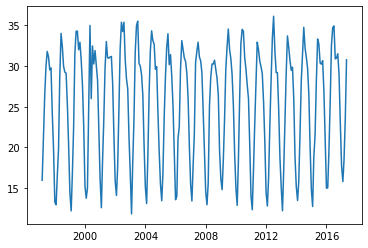

In [4]:
#newdata
train = newdata[:'2015']
test  = newdata['2016':]
plt.plot(newdata)

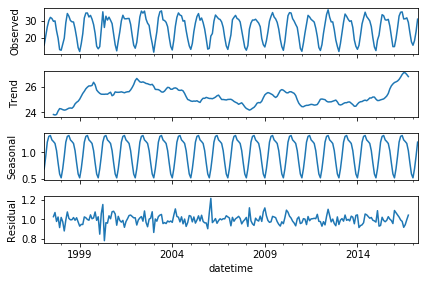

In [5]:
result = seasonal_decompose(newdata, model = 'multiplicative')
result.plot()
plt.show()

In [6]:
from statsmodels.tsa.stattools import adfuller

def stationarity_check(ts):
    
    roll_mean = ts.rolling(window = 12).mean()
    movingstd = ts.rolling(window = 12).std()
    
    orig = plt.plot(ts, color='blue',label='Original')
    mean = plt.plot(roll_mean, color='red', label='Rolling Mean')
    std = plt.plot(movingstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(ts, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

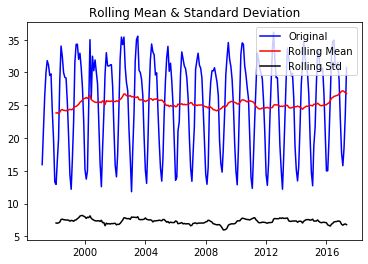

Results of Dickey-Fuller Test:
Test Statistic                  -2.275936
p-value                          0.179846
#Lags Used                      11.000000
Number of Observations Used    231.000000
Critical Value (1%)             -3.458980
Critical Value (5%)             -2.874135
Critical Value (10%)            -2.573482
dtype: float64


In [7]:
stationarity_check(newdata)

In [8]:
log_series = np.log(newdata)
log_series.head()

datetime
1997-02-28    2.768989
1997-03-31    3.051027
1997-04-30    3.269832
1997-05-31    3.399523
1997-06-30    3.459661
Freq: M, Name: Temperature, dtype: float64

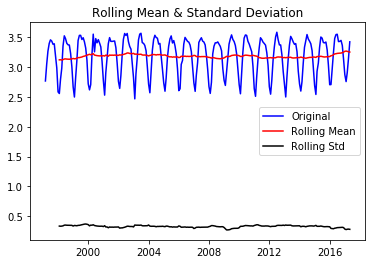

Results of Dickey-Fuller Test:
Test Statistic                  -2.315710
p-value                          0.166951
#Lags Used                      14.000000
Number of Observations Used    228.000000
Critical Value (1%)             -3.459361
Critical Value (5%)             -2.874302
Critical Value (10%)            -2.573571
dtype: float64


In [9]:
stationarity_check(log_series)

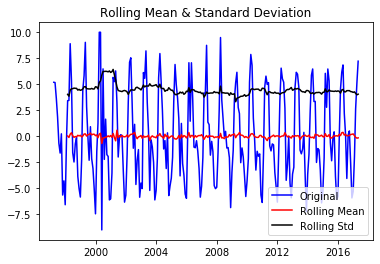

Results of Dickey-Fuller Test:
Test Statistic                -1.597684e+01
p-value                        6.905477e-29
#Lags Used                     1.000000e+01
Number of Observations Used    2.310000e+02
Critical Value (1%)           -3.458980e+00
Critical Value (5%)           -2.874135e+00
Critical Value (10%)          -2.573482e+00
dtype: float64


In [10]:
diff_series = newdata.diff()
diff_series = diff_series.dropna()
stationarity_check(diff_series)

In [11]:
diff_log_series = log_series.diff()
diff_log_series = diff_log_series.dropna()

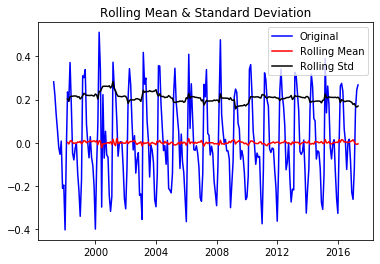

Results of Dickey-Fuller Test:
Test Statistic                -8.467988e+00
p-value                        1.504252e-13
#Lags Used                     1.200000e+01
Number of Observations Used    2.290000e+02
Critical Value (1%)           -3.459233e+00
Critical Value (5%)           -2.874245e+00
Critical Value (10%)          -2.573541e+00
dtype: float64


In [12]:
stationarity_check(diff_log_series)

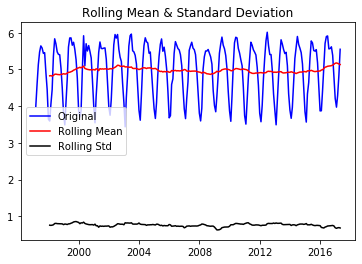

Results of Dickey-Fuller Test:
Test Statistic                  -2.412440
p-value                          0.138256
#Lags Used                      14.000000
Number of Observations Used    228.000000
Critical Value (1%)             -3.459361
Critical Value (5%)             -2.874302
Critical Value (10%)            -2.573571
dtype: float64


In [13]:
sqrt_series = np.sqrt(newdata)
stationarity_check(sqrt_series)

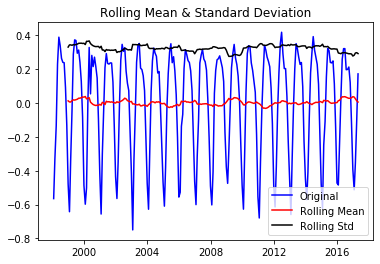

Results of Dickey-Fuller Test:
Test Statistic                  -4.375369
p-value                          0.000328
#Lags Used                      14.000000
Number of Observations Used    217.000000
Critical Value (1%)             -3.460849
Critical Value (5%)             -2.874953
Critical Value (10%)            -2.573919
dtype: float64


In [14]:
mov_avg = log_series.rolling(window = 12).mean()
ma_log_series = log_series - mov_avg
ma_log_series = ma_log_series.dropna()
stationarity_check(ma_log_series)

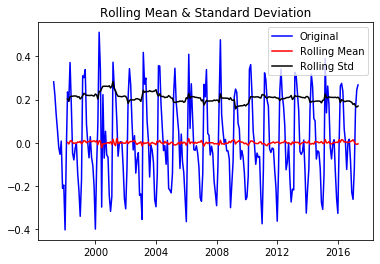

Results of Dickey-Fuller Test:
Test Statistic                -8.467988e+00
p-value                        1.504252e-13
#Lags Used                     1.200000e+01
Number of Observations Used    2.290000e+02
Critical Value (1%)           -3.459233e+00
Critical Value (5%)           -2.874245e+00
Critical Value (10%)          -2.573541e+00
dtype: float64


In [15]:
shift_log_series = log_series - log_series.shift()
shift_log_series = shift_log_series.dropna()
stationarity_check(shift_log_series)